# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Harist Islami Ridha
- **Email:** mc671d5y0257@student.devacademy.id
- **ID Dicoding:** MC671D5Y0257

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?
- Kapan waktu puncak peminjaman sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pengaturan tampilan visualisasi agar lebih jelas
sns.set_style("whitegrid")

# Menampilkan versi library utama
import sys

## Data Wrangling

### Gathering Data

In [38]:
# Load dataset
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

# Tampilkan 5 baris pertama
print("Dataset day.csv:")
display(df_day.head())  # Untuk Google Colab atau Jupyter Notebook

print("\nDataset hour.csv:")
display(df_hour.head())


Dataset day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Dataset hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset ini mencakup berbagai faktor seperti cuaca, musim, hari kerja/libur, suhu, kelembaban, dan jumlah penyewaan sepeda.
- Dataset harian (day.csv) lebih cocok untuk analisis tren jangka panjang, sedangkan dataset per jam (hour.csv) lebih baik untuk memahami pola waktu spesifik.

### Assessing Data

In [39]:
# Mengecek informasi umum tentang dataset
print("Informasi Dataset (day.csv):")
df_day.info()

print("\nInformasi Dataset (hour.csv):")
df_hour.info()

# Mengecek apakah ada missing values dalam dataset
print("\nJumlah Missing Values (day.csv):")
print(df_day.isnull().sum())

print("\nJumlah Missing Values (hour.csv):")
print(df_hour.isnull().sum())

# Mengecek statistik deskriptif dataset
print("\nStatistik Deskriptif (day.csv):")
print(df_day.describe())

print("\nStatistik Deskriptif (hour.csv):")
print(df_hour.describe())


Informasi Dataset (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi Dataset (hour.csv):
<class 'pandas.core.frame.DataFra

**Insight:**
- Tidak ada nilai yang hilang dalam dataset, sehingga tidak perlu imputasi data.
- Beberapa kolom seperti dteday perlu dikonversi ke format datetime untuk analisis berbasis waktu.

### Cleaning Data

In [40]:
# Konversi kolom tanggal ke format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"], format='%Y-%m-%d')
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"], format='%Y-%m-%d')


# Menampilkan informasi setelah cleaning
def check_data_info(df, name):
    print(f"\nInformasi {name}:")
    print(df.info())
    print("\nJumlah Missing Values:")
    print(df.isnull().sum())

check_data_info(df_day, "Dataset Harian")
check_data_info(df_hour, "Dataset Per Jam")


Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtyp

**Insight:**
- Mengganti dtype object dengan format datetime, kita bisa melakukan analisis tren berdasarkan waktu secara lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore dataset df_day

In [41]:
# melihat rangkuman parameter statistik pada dataset df_day
print("\nStatistik Deskriptif (day.csv):")
display(df_day.describe(include="all"))


Statistik Deskriptif (day.csv):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [42]:
# Statistik penyewaan berdasarkan musim
season_summary = df_day.groupby(by="season").agg({
    "cnt": ["count", "mean", "max", "min", "std"]
})

# Statistik penyewaan berdasarkan kondisi cuaca
weather_summary = df_day.groupby(by="weathersit").agg({
    "cnt": ["count", "mean", "max", "min", "std"]
})

display(season_summary)
display(weather_summary)

cnt                                      
       count         mean   max   min          std
season                                            
1        181  2604.132597  7836   431  1399.942119
2        184  4992.331522  8362   795  1695.977235
3        188  5644.303191  8714  1115  1459.800381
4        178  4728.162921  8555    22  1699.615261

cnt                                     
           count         mean   max  min          std
weathersit                                           
1            463  4876.786177  8714  431  1879.483989
2            247  4035.862348  8362  605  1809.109918
3             21  1803.285714  4639   22  1240.284449

In [43]:
# mencari jumlah penyewaan pada hari kerja dan libur
day_summary = df_day.groupby(by="workingday").agg({
    "cnt": ["count", "mean", "max", "min", "std"]
})

display(day_summary)

cnt                                     
           count         mean   max  min          std
workingday                                           
0            231  4330.168831  8714  605  2052.141245
1            500  4584.820000  8362   22  1878.415583

<ipython-input-44-e2b4c49a3f8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='season', y='cnt', palette=("coolwarm"))


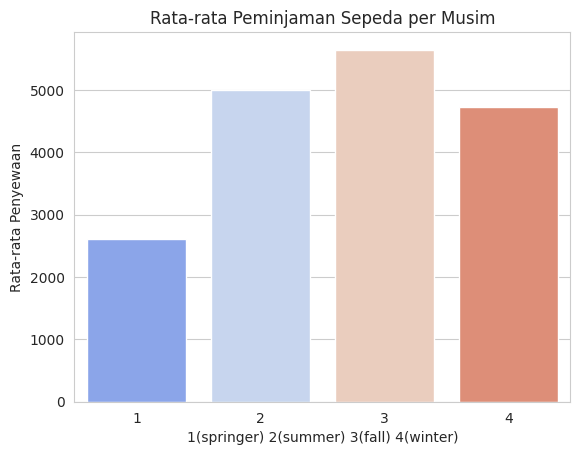

In [44]:
season_summary = df_day.groupby('season')['cnt'].mean().reset_index()
sns.barplot(data=season_summary, x='season', y='cnt', palette=("coolwarm"))
plt.xlabel('1(springer) 2(summer) 3(fall) 4(winter)')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.show()

<ipython-input-45-5775e5d8e47b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x='weathersit', y='cnt', palette=("coolwarm"))


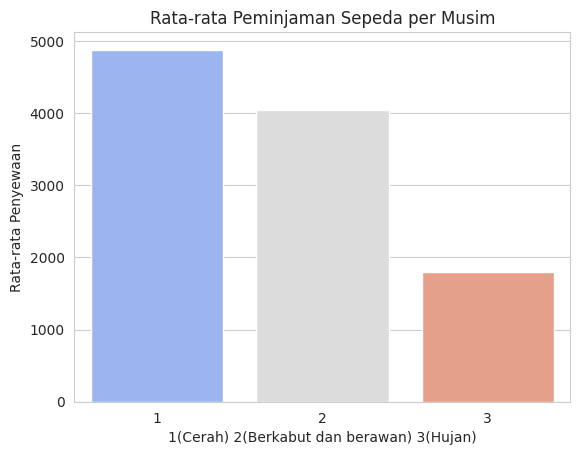

In [45]:
season_summary = df_day.groupby('weathersit')['cnt'].mean().reset_index()
sns.barplot(data=season_summary, x='weathersit', y='cnt', palette=("coolwarm"))
plt.xlabel('1(Cerah) 2(Berkabut dan berawan) 3(Hujan)')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.show()

<ipython-input-46-dc29f4d0172f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=df_day, palette="coolwarm")


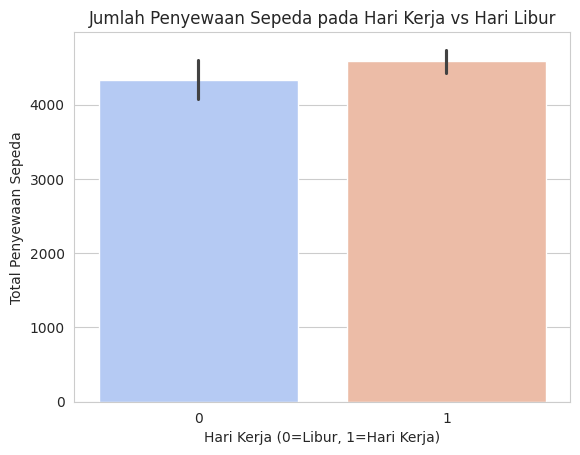

In [46]:
# Tren penyewaan sepeda pada hari kerja vs hari libur
sns.barplot(x="workingday", y="cnt", data=df_day, palette="coolwarm")
plt.title("Jumlah Penyewaan Sepeda pada Hari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (0=Libur, 1=Hari Kerja)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

### Insight
- Musim 3 (Fall) memiliki rata-rata penyewaan tertinggi (5644.30) dan jumlah maksimum penyewaan tertinggi (8714).
- Musim 1 (Spring) memiliki rata-rata penyewaan terendah (2604.13).
- Standar deviasi (std) tinggi menunjukkan bahwa jumlah penyewaan bervariasi antar hari.

### Explore dataset df_hour

In [47]:
# melihat rangkuman parameter statistik pada dataset df_hour
print("\nStatistik Deskriptif (hour.csv):")
display(df_hour.describe(include="all"))


Statistik Deskriptif (hour.csv):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [48]:
# Statistik penyewaan tertinggi per hari
day_summary = df_hour.groupby(by="hr").agg({
    "cnt": ["count", "mean", "max", "min", "std"]
})

display(day_summary)

cnt                                 
   count        mean  max min         std
hr                                       
0    726   53.898072  283   2   42.307910
1    724   33.375691  168   1   33.538727
2    715   22.869930  132   1   26.578642
3    697   11.727403   79   1   13.239190
4    697    6.352941   28   1    4.143818
5    717   19.889819   66   1   13.200765
6    725   76.044138  213   1   55.084348
7    727  212.064649  596   1  161.441936
8    727  359.011004  839   5  235.189285
9    727  219.309491  426  14   93.703458
10   727  173.668501  539   8  102.205413
11   727  208.143054  663  10  127.495536
12   728  253.315934  776   3  145.081134
13   729  253.661180  760  11  148.107657
14   729  240.949246  750  12  147.271574
15   729  251.233196  750   7  144.632541
16   730  311.983562  783  11  148.682618
17   730  461.452055  976  15  232.656611
18   728  425.510989  977  23  224.639304
19   728  311.523352  743  11  161.050359
20   728  226.030220  567  11  119.670164
21   728  172.314560  584   6   89.788893
22   728  131.335165  502   9   69.937782
23   728   87.831044  256   2   50.846889

In [49]:
# mencari jam sibuk penyewaan sepeda
hourly_summary = df_hour.groupby("hr")["cnt"].mean().reset_index()
hourly_summary = hourly_summary.sort_values(by="cnt", ascending=False)

# Menampilkan 5 jam dengan penyewaan tertinggi
print("5 Jam dengan Penyewaan Tertinggi:")
print(hourly_summary.head())

5 Jam dengan Penyewaan Tertinggi:
    hr         cnt
17  17  461.452055
18  18  425.510989
8    8  359.011004
16  16  311.983562
19  19  311.523352


**Insight:**
- Penyewaan paling sedikit terjadi antara pukul 2:00 - 5:00 (jam 2 - 5), dengan rata-rata hanya 6 hingga 33 sepeda.
- Jam sibuk dengan banyak pengguna: Jam 8 pagi & 16-19 sore.
- Perlu ada lebih banyak sepeda yang tersedia pada jam sibuk untuk memenuhi permintaan.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?

<ipython-input-50-9e17981979e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=df_day,  palette="coolwarm")


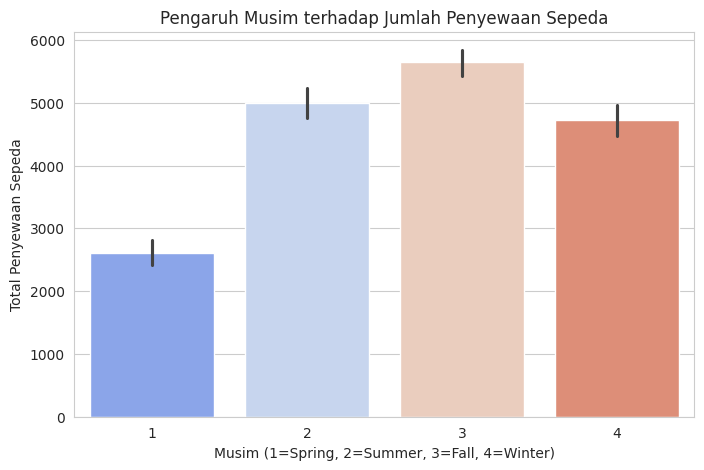

In [50]:
# Pengaruh musim terhadap Jumlah Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=df_day,  palette="coolwarm")
plt.title("Pengaruh Musim terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

<ipython-input-51-5f4e353b0816>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=df_day, palette="coolwarm")


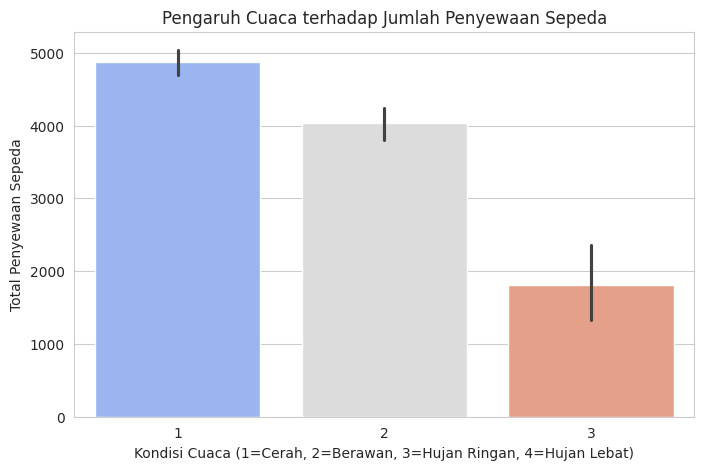

In [51]:
# Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=df_day, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Berawan, 3=Hujan Ringan, 4=Hujan Lebat)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

### Pertanyaan 2:Kapan waktu puncak peminjaman sepeda dalam sehari?

<ipython-input-52-c20ffb07572c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=df_hour, estimator="mean", ci=None, marker="o", color="red")


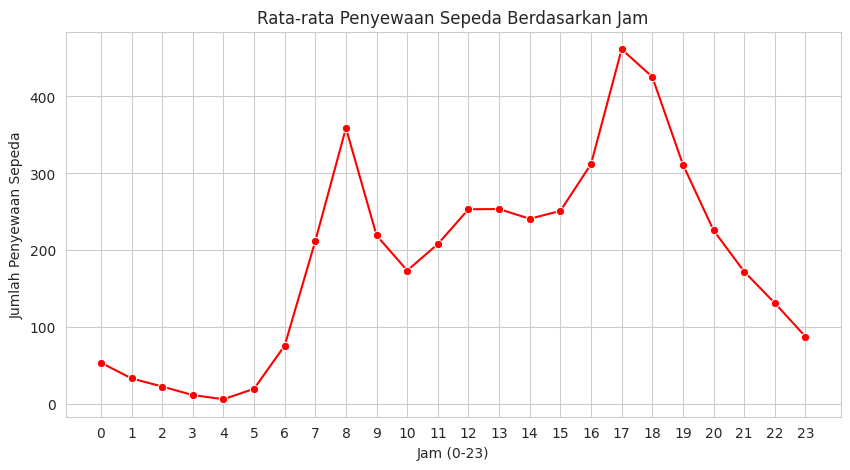

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=df_hour, estimator="mean", ci=None, marker="o", color="red")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Cuaca cerah (1) memiliki jumlah penyewaan tertinggi, sementara hujan ringan (3) dan hujan lebat (4) mengurangi jumlah penyewaan secara drastis.
- Musim gugur (fall) memiliki jumlah penyewaan tertinggi, sementara musim semi memiliki jumlah penyewaan terendah. Ini bisa jadi karena kondisi cuaca yang lebih baik di musim gugur dibandingkan musim semi.
- Jumlah terbanyak peminjaman sepeda perhari terjadi pada jam 5

## Conclusion

1. Pengaruh Musim terhadap Penyewaan Sepeda
- Jika jumlah penyewaan meningkat di musim tertentu, maka musim memang mempengaruhi perilaku pengguna.
- Jika jumlah penyewaan hampir sama di semua musim, berarti musim tidak berpengaruh signifikan.

2. Pengaruh Cuaca terhadap Penyewaan Sepeda
- Jika jumlah penyewaan lebih rendah saat hujan, berarti cuaca buruk menurunkan minat penyewaan.
- Jika penyewaan tetap tinggi meskipun cuaca buruk, berarti faktor cuaca kurang berpengaruh.